<center> <b>imports</b> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.linear_model import SGDRegressor

In [41]:
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('d:/uber-taxi-demand/data/yellow_tripdata_2022.csv')
df.head()

,tpep_pickup_datetime,passenger_count,VendorID
0,2022-01-01 00:00:00,6838,4261
1,2022-01-01 01:00:00,7738,4997
2,2022-01-01 02:00:00,5974,3901
3,2022-01-01 03:00:00,4107,2686
4,2022-01-01 04:00:00,2485,1651


In [4]:
df.tail()

,tpep_pickup_datetime,passenger_count,VendorID
21619,2022-12-31 19:00:00,8584,5730
21620,2022-12-31 20:00:00,9419,6210
21621,2022-12-31 21:00:00,9081,5962
21622,2022-12-31 22:00:00,6732,4350
21623,2022-12-31 23:00:00,4873,3273


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tpep_pickup_datetime  21624 non-null  object
 1   passenger_count       21624 non-null  int64 
 2   VendorID              21624 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.9+ KB


In [6]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tpep_pickup_datetime  21624 non-null  datetime64[ns]
 1   passenger_count       21624 non-null  int64         
 2   VendorID              21624 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 506.9 KB


In [7]:
df.loc[0, 'tpep_pickup_datetime'].weekofyear

52

In [8]:
######## Day, Month, Hour

In [9]:
data = df.set_index('tpep_pickup_datetime').copy()
data

,passenger_count,VendorID
tpep_pickup_datetime,,
2022-01-01 00:00:00,6838,4261
2022-01-01 01:00:00,7738,4997
2022-01-01 02:00:00,5974,3901
2022-01-01 03:00:00,4107,2686
2022-01-01 04:00:00,2485,1651
...,...,...
2022-12-31 19:00:00,8584,5730
2022-12-31 20:00:00,9419,6210
2022-12-31 21:00:00,9081,5962


In [10]:
data.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='tpep_pickup_datetime', length=21624)

In [11]:
def add_timed_features(df: pd.DataFrame) -> pd.DataFrame:
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    return df

In [12]:
add_timed_features(data)

,passenger_count,VendorID,hour,day,month,dayofweek
tpep_pickup_datetime,,,,,,
2022-01-01 00:00:00,6838,4261,0,1,1,5
2022-01-01 01:00:00,7738,4997,1,1,1,5
2022-01-01 02:00:00,5974,3901,2,1,1,5
2022-01-01 03:00:00,4107,2686,3,1,1,5
2022-01-01 04:00:00,2485,1651,4,1,1,5
...,...,...,...,...,...,...
2022-12-31 19:00:00,8584,5730,19,31,12,5
2022-12-31 20:00:00,9419,6210,20,31,12,5
2022-12-31 21:00:00,9081,5962,21,31,12,5


In [13]:
data.sort_index(inplace=True)

In [14]:
data = data.loc[data.index<"2023-01-01 00:00:00"]

In [15]:
data

,passenger_count,VendorID,hour,day,month,dayofweek
tpep_pickup_datetime,,,,,,
2022-01-01 00:00:00,6838,4261,0,1,1,5
2022-01-01 01:00:00,7738,4997,1,1,1,5
2022-01-01 02:00:00,5974,3901,2,1,1,5
2022-01-01 03:00:00,4107,2686,3,1,1,5
2022-01-01 04:00:00,2485,1651,4,1,1,5
...,...,...,...,...,...,...
2022-12-31 21:00:00,0,0,21,31,12,5
2022-12-31 22:00:00,0,0,22,31,12,5
2022-12-31 22:00:00,6732,4350,22,31,12,5


<center> <b>Trend Analysis</b> </center>

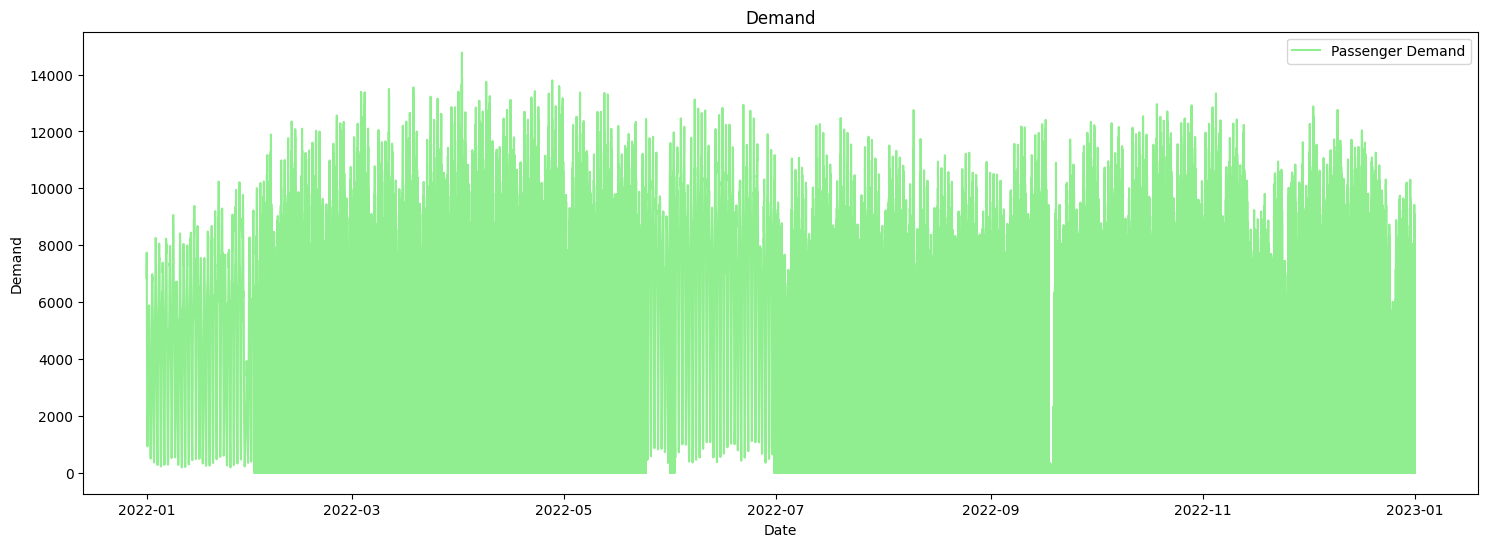

In [16]:
plt.figure(figsize=(18, 6))
plt.plot(data[['passenger_count',]], label="Passenger Demand", color='lightgreen')
plt.title("Demand")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.show()

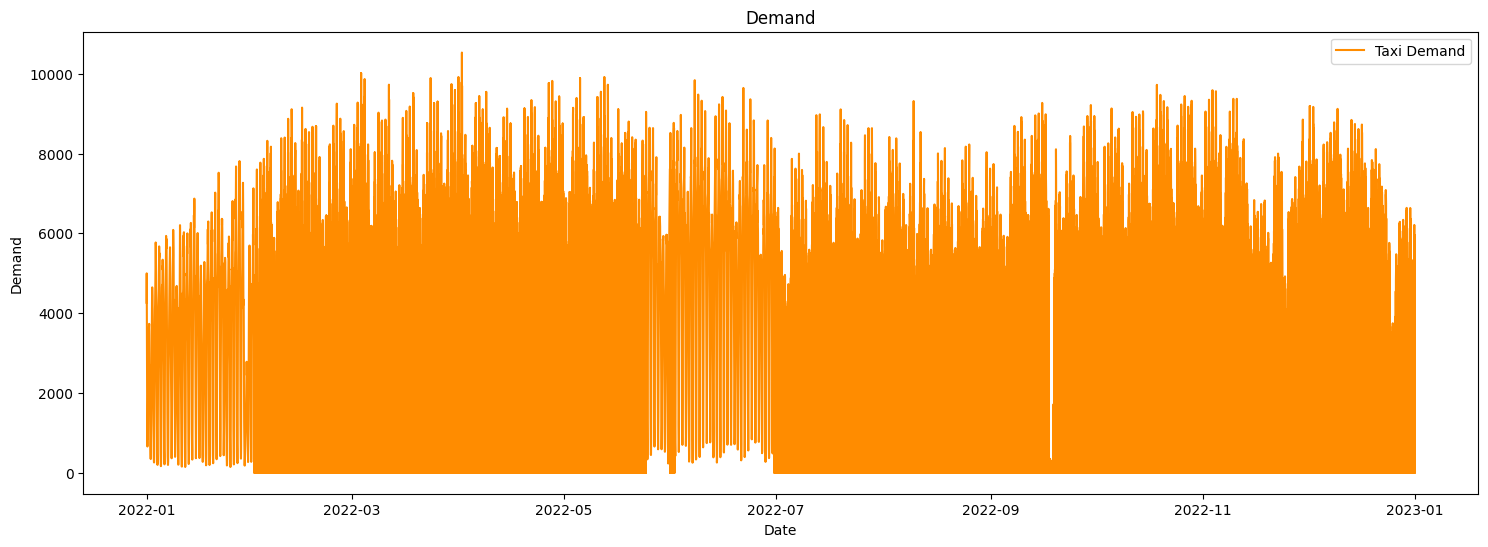

In [27]:
plt.figure(figsize=(18, 6))
plt.plot(data[['VendorID',]], label="Taxi Demand", color='darkorange')
plt.title("Demand")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.show()

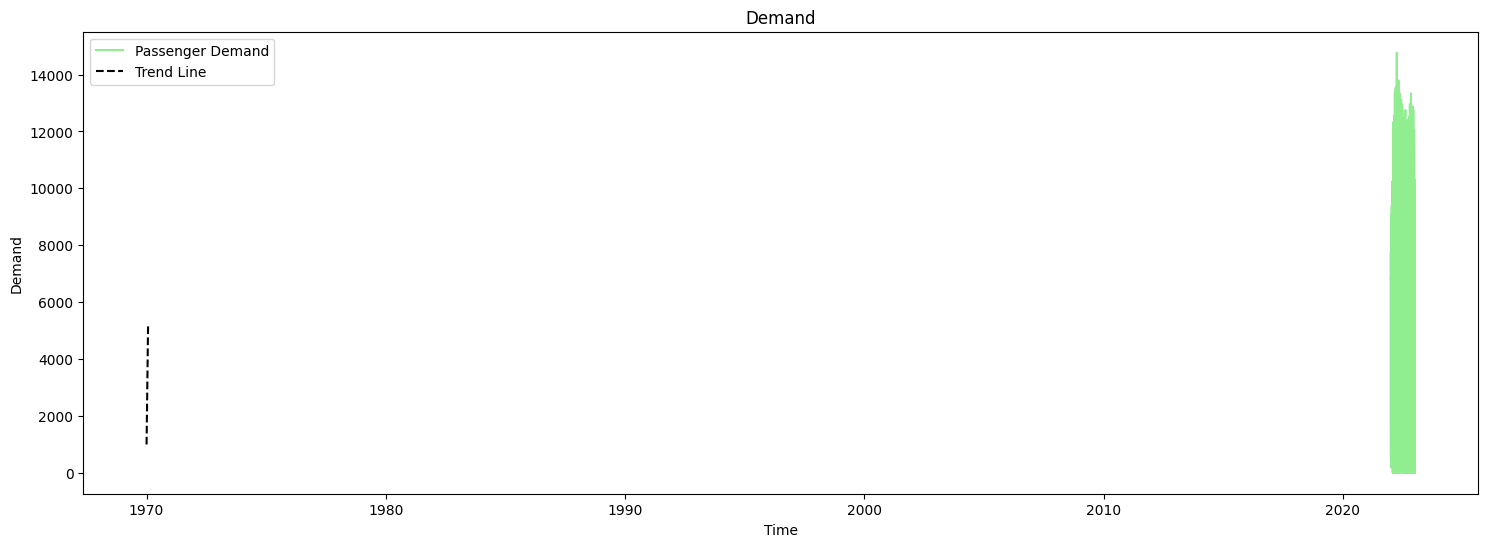

In [28]:
# Extract the date index as a numerical variable
x_values = data.index.hour.values.reshape(-1,1)

# Fit a linear regression model to estimate the trend
reg = SGDRegressor().fit(x_values, data['passenger_count'])


# Visualize the trend line
trend_line = reg.predict(x_values)
plt.figure(figsize=(18, 6))
plt.plot(data[['passenger_count',]], label="Passenger Demand", color='lightgreen')
plt.plot(data.hour.values, trend_line, label="Trend Line", color='black', linestyle='--')
plt.title("Demand")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()

<center> <b>Seasonality Analysis</b> </center>

In [36]:
weekly = data.resample('W').agg({'passenger_count':'sum', 'VendorID': 'count'})

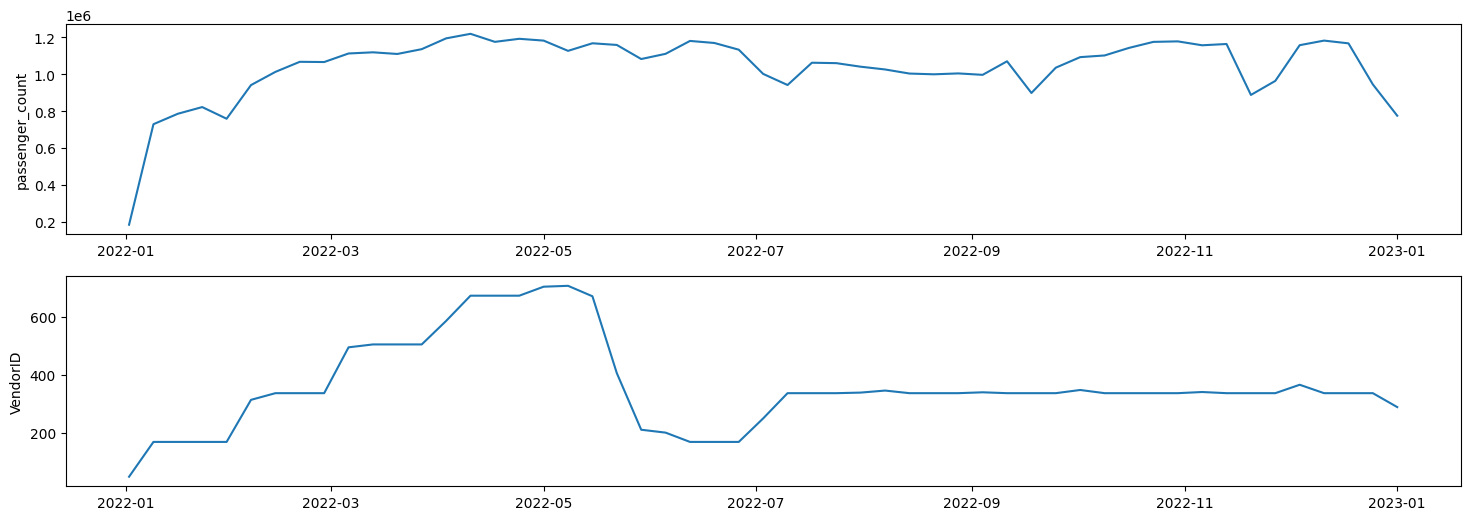

In [39]:
fig, grid = plt.subplots(2, 1, figsize=(18, 6))
sns.lineplot(data=weekly, x=weekly.index.values, y='passenger_count', ax=grid[0])
sns.lineplot(data=weekly, x=weekly.index.values, y='VendorID', ax=grid[1])
plt.show()

In [ ]:
### Task  monthly, Quarterly 

<center> <b>Stationarity Analysis</b> </center>

In [42]:
# Perform the ADF test on the time series data
result = adfuller(data['passenger_count'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)


ADF Test Statistic: -7.892691072667676
p-value: 4.39334572475745e-12


In [43]:
0.05 > 0.00000000000439334572475745

True

<center> <b>Autocorrelation Analysis</b> </center>